In [1]:
import numpy as np 
import pandas as pd 
import pickle

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
viz.get_style()

In [63]:
 # Table S1: goodness of fit in exp1
fname = f'../figures/extend/TableS1_goodness_of_fit.csv'
get_table1('exp1', 
            ['rlPG', 'cascade', 'rdPG'], 
            method='mle').to_csv(fname, index = False, header=True)



             # ------------------------------- rlPG --------------------------------- #
                 Overall nll: 114.562      aic: 231.123      bic: 234.498
                 Train nll: 66.196         aic: 134.392      bic: 137.180            
                 Test nll: 48.365          aic: 98.731       bic: 101.518 
         

             # ------------------------------- cascade --------------------------------- #
                 Overall nll: 111.111      aic: 226.221      bic: 232.972
                 Train nll: 64.231         aic: 132.462      bic: 138.037            
                 Test nll: 46.880          aic: 97.759       bic: 103.334 
         

             # ------------------------------- rdPG --------------------------------- #
                 Overall nll: 101.976      aic: 209.951      bic: 220.077
                 Train nll: 62.275         aic: 130.550      bic: 138.912            
                 Test nll: 39.701          aic: 85.401       bic: 93.764 
      

In [67]:
# Table S1: goodness of fit in exp2
fname = f'../figures/extend/TableS2_goodness_of_fit.csv'
get_table2('exp2', 
            ['rlPG_fea', 'cascade_fea', 'rdPG_fea', 'LC', 'ACL'], 
            method='mle').to_csv(fname, index = False, header=True)


             # --------------------- rlPG_fea --------------------- #
                 Tot nll: 196.291      aic: 394.583      bic: 398.469
                 cons nll: 56.465      aic: 114.929      bic: 117.717            
                 cont nll: 64.176      aic: 130.351      bic: 133.139
                 conf nll: 75.651      aic: 153.302      bic: 156.089 
         

             # --------------------- cascade_fea --------------------- #
                 Tot nll: 192.406      aic: 388.812      bic: 396.584
                 cons nll: 56.888      aic: 117.777      bic: 123.352            
                 cont nll: 61.430      aic: 126.859      bic: 132.434
                 conf nll: 74.088      aic: 152.176      bic: 157.751 
         

             # --------------------- rdPG_fea --------------------- #
                 Tot nll: 170.834      aic: 347.668      bic: 359.326
                 cons nll: 47.379      aic: 100.757      bic: 109.120            
                 cont nll:

In [56]:
def get_param(exp, agents, method='mle'):
    param_data = {'mean': [], 'std': []}
    param_index = []
    for m in agents:
        fname = f'../fits/{exp}/fit_sub_info-{m}-{method}.pkl'
        with open(fname, 'rb')as handle: fit_sub_info = pickle.load(handle)
        sub_lst = list(fit_sub_info.keys())
        if 'group' in sub_lst: sub_lst.pop(sub_lst.index('group'))
        param_lst = [fit_sub_info[sub_id]['param'] for sub_id in sub_lst]
        tmp = np.vstack(param_lst)
        p_trans = eval(m).p_trans
        param_lst = [fn(tmp[:, i]) for i, fn in enumerate(p_trans)]
        param_lst = np.vstack(param_lst).T
        p_name = fit_sub_info[sub_lst[0]]['param_name']
        p_name = p_name[:-1] if m=='LC' else p_name  
        pdata = pd.DataFrame(param_lst, columns=p_name)
        mus, sigs = [], []
        for col in pdata.columns:
            lb = pdata.loc[:, col].quantile(.1)
            ub = pdata.loc[:, col].quantile(.9)
            sel_data = pdata.query(f'{col}>={lb} & {col}<={ub}')
            mus.append(sel_data[col].mean())
            sigs.append(sel_data[col].std())
        p_name = [f'{eval(m).name}: {p}' for p in p_name]
        param_index += p_name
        param_data['mean'] += mus
        param_data['std'] += sigs
    param_data = pd.DataFrame.from_dict(param_data)
    param_data.index = param_index
    return param_data.round(3)

In [57]:
# Table S3: the parameter for exp1
get_param('exp1', 
            ['rlPG', 'cascade', 'rdPG'], 
            method='mle').to_csv('../figures/extend/TableS3_param_exp1.csv')

In [58]:
# Table S4: the parameter for exp2
get_param('exp2', 
            ['rlPG_fea', 'cascade_fea', 'rdPG_fea', 'LC', 'ACL'], 
            method='mle').to_csv('../figures/extend/TableS4_param_exp2.csv')

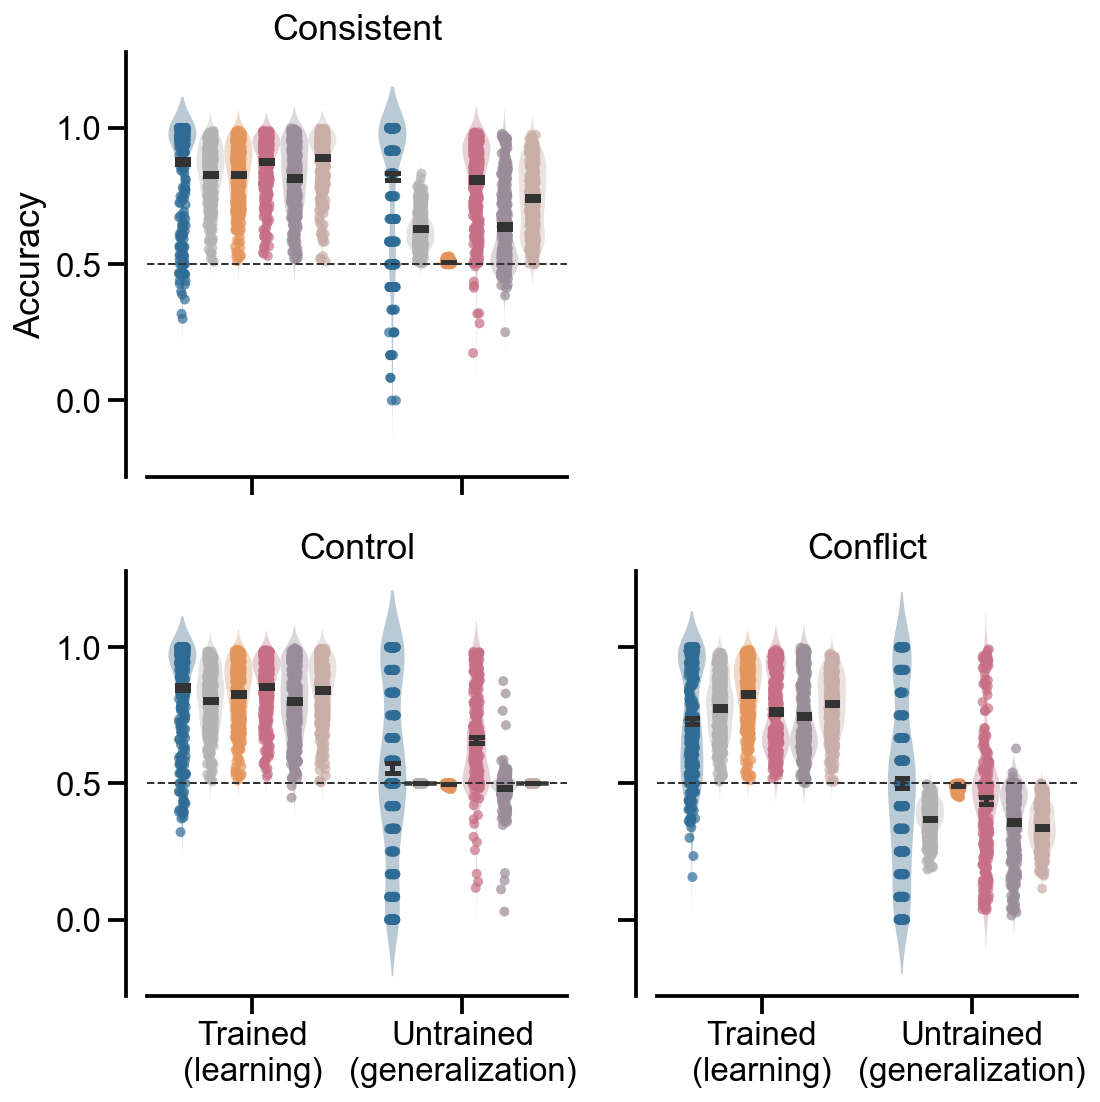

In [59]:
# Figure S1A: the learning and generalization for all figures
dpi=300
viz_transfer_cond('exp2', 
             agents=['human', 'rlPG_fea', 'cascade_fea', 
                     'rdPG_fea', 'LC', 'ACL'], 
             method='mle')
plt.savefig(f'../figures/extend/FigS1_transfer_all.pdf', dpi=dpi)

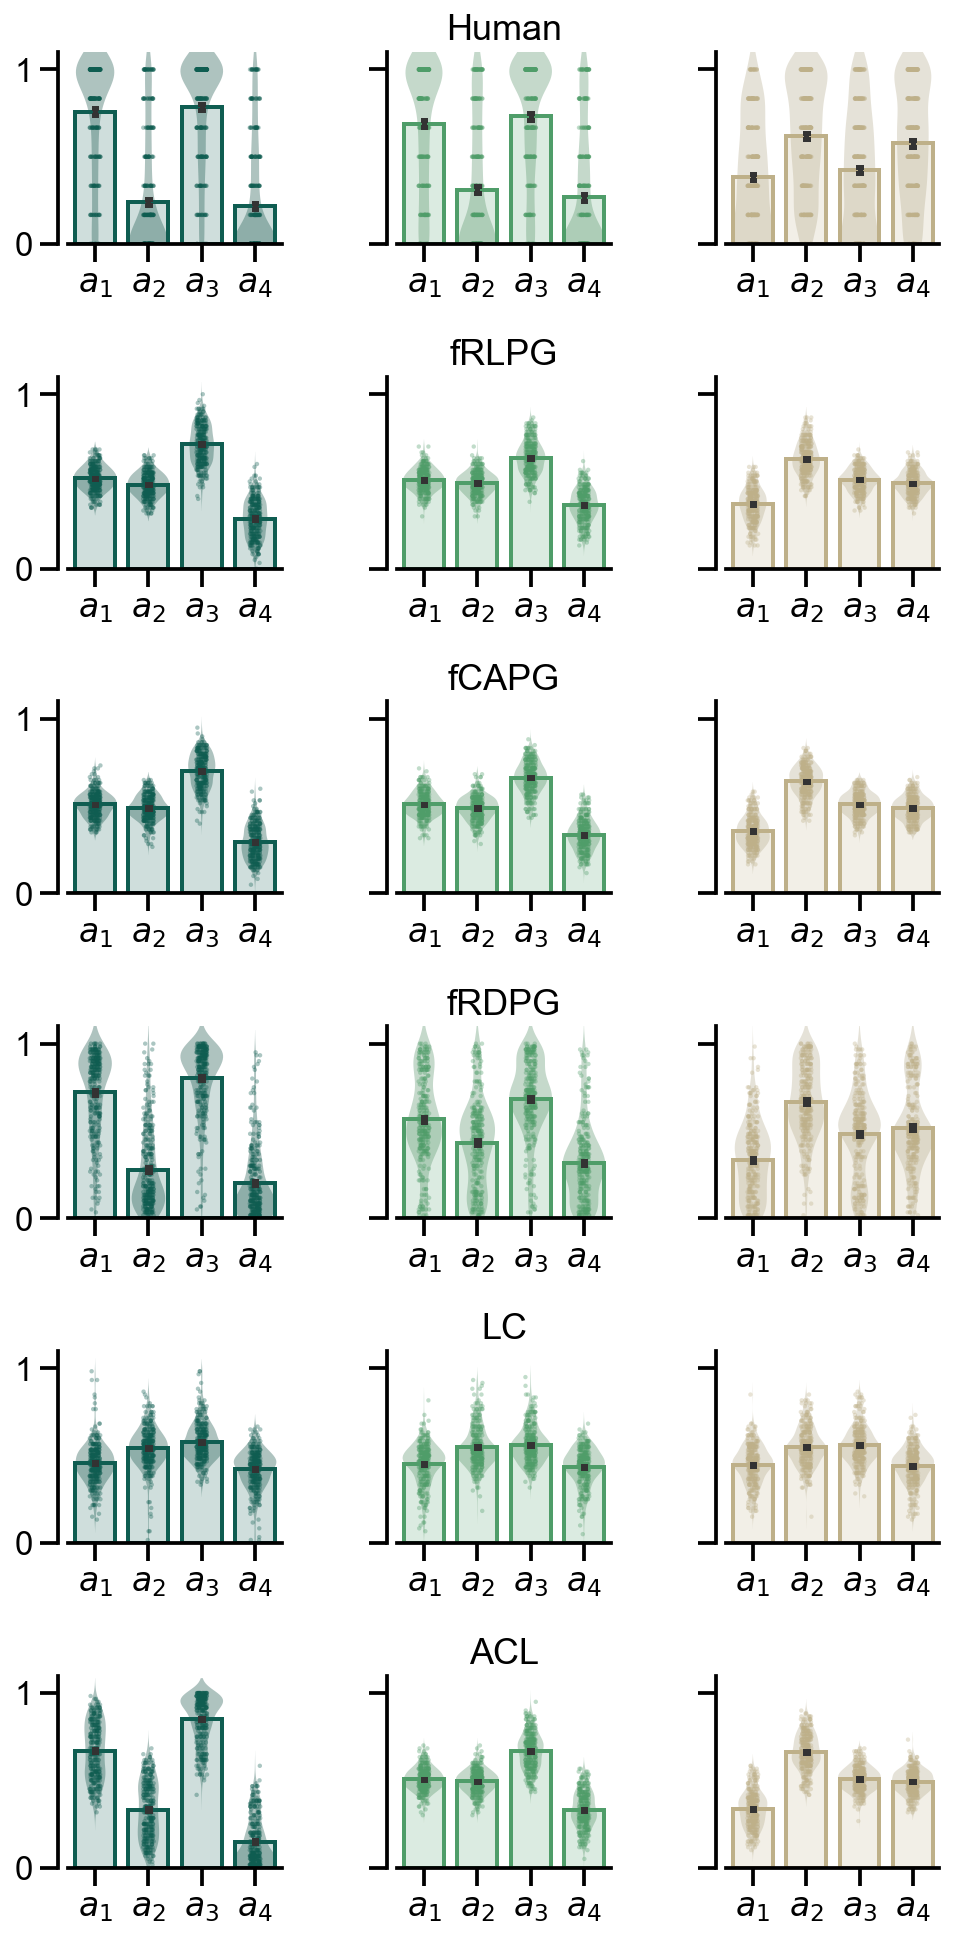

In [80]:
viz_Probe('exp2', 
          ['human', 'rlPG_fea', 'cascade_fea', 'rdPG_fea', 'LC', 'ACL'], 
          'mle')
plt.savefig(f'../figures/extend/FigS2_probPolicy_all.pdf', dpi=dpi)

## representation evolution

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very l

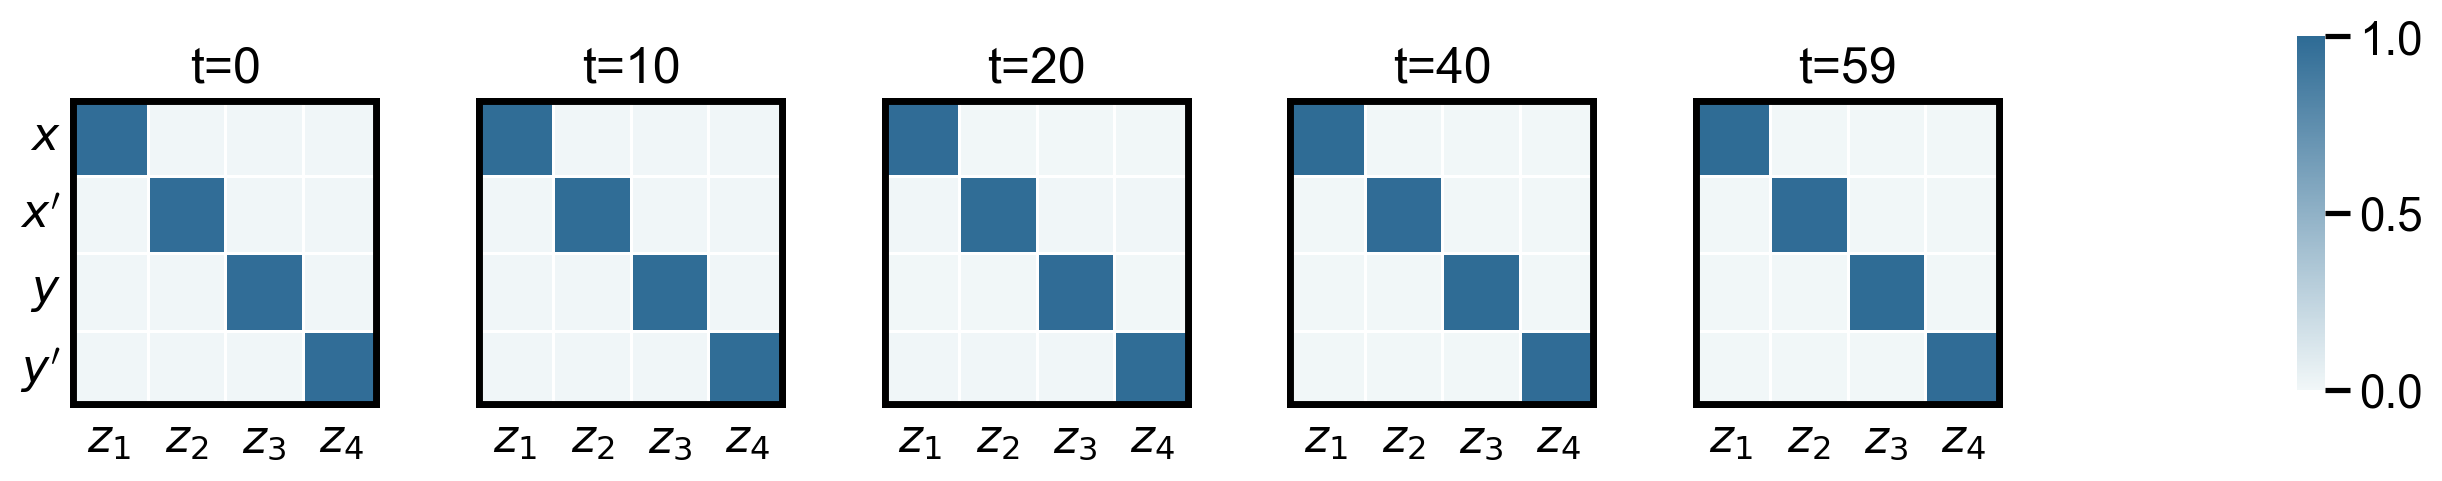

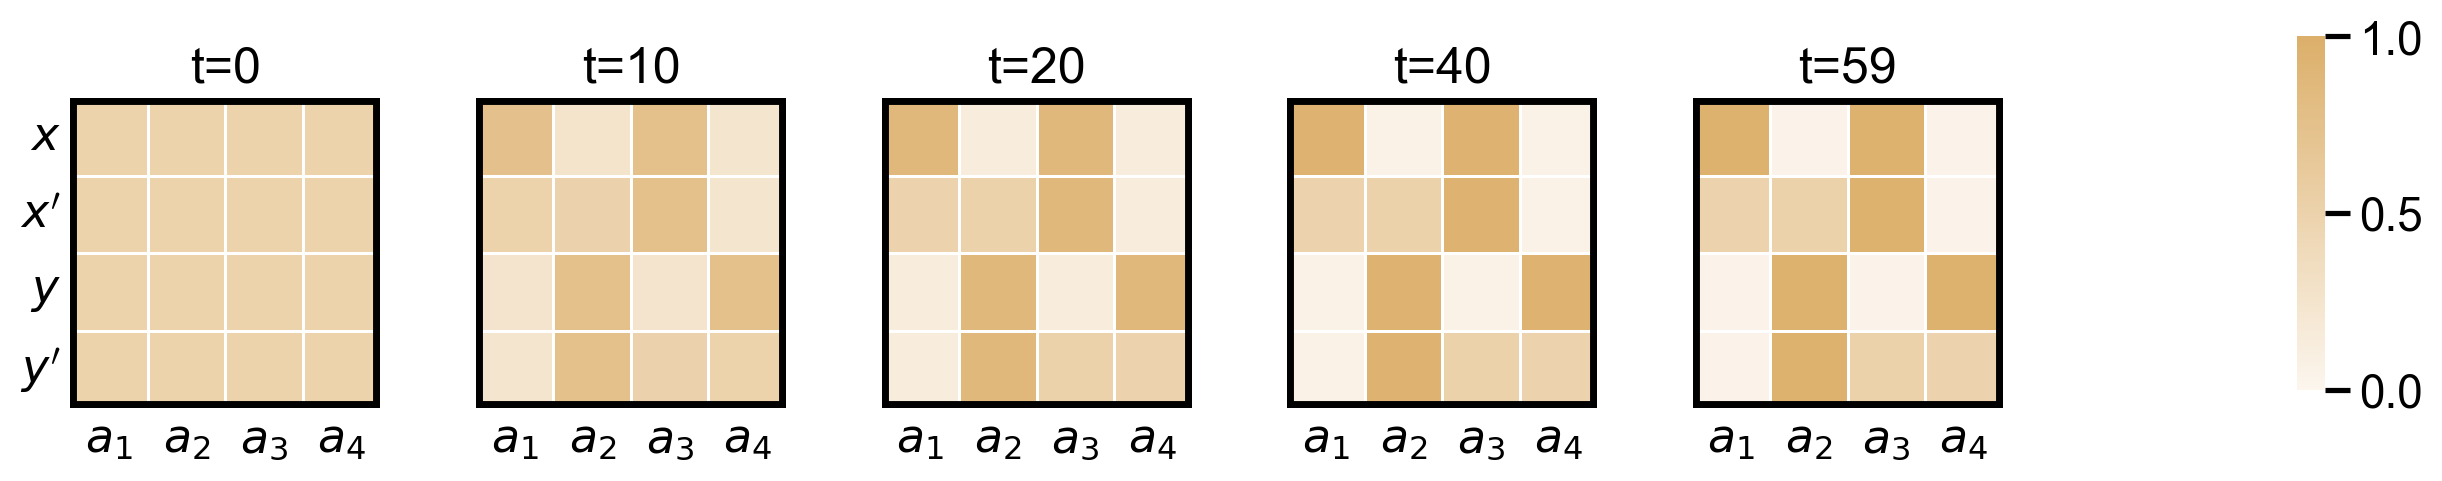

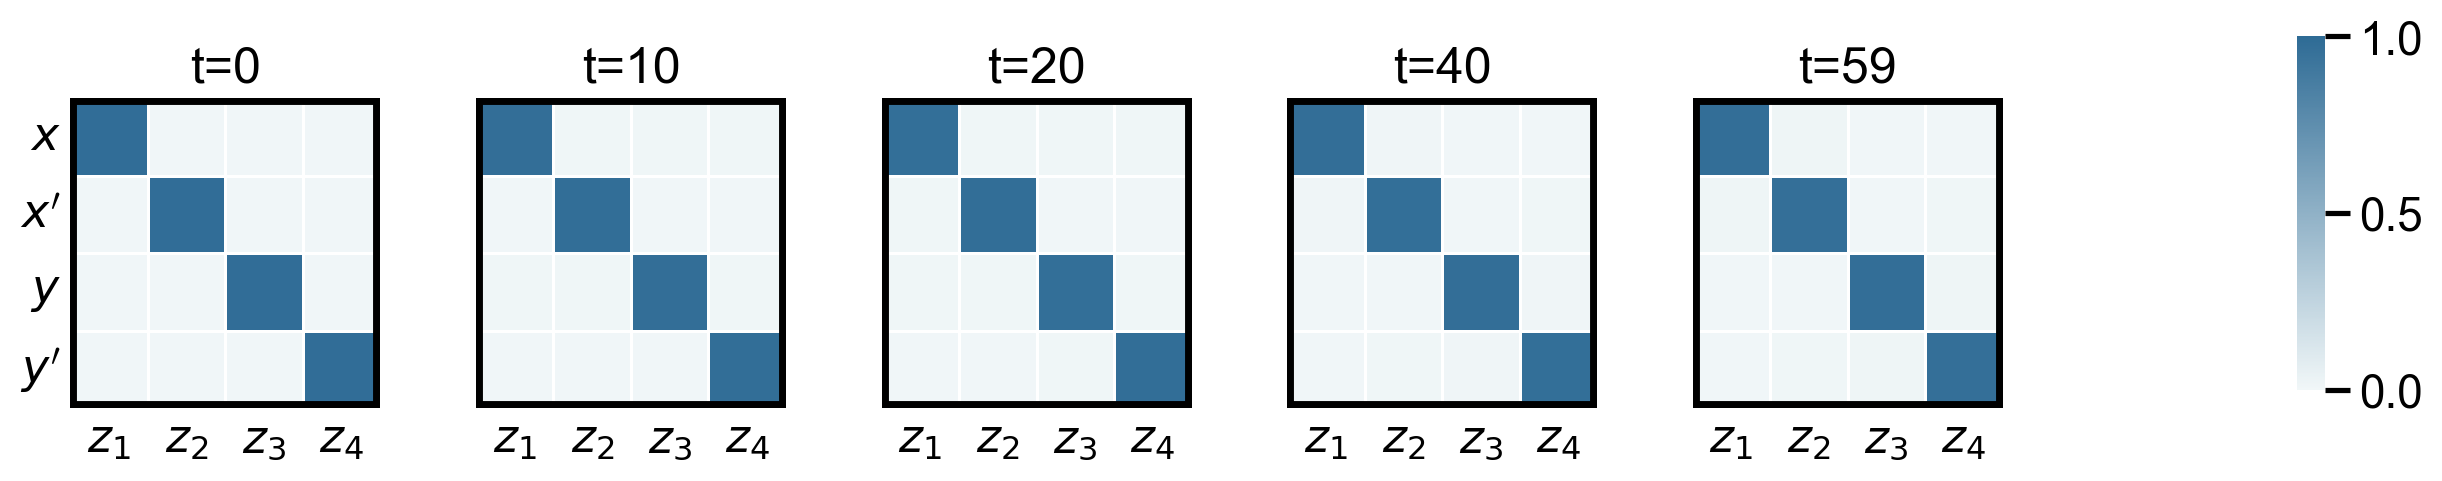

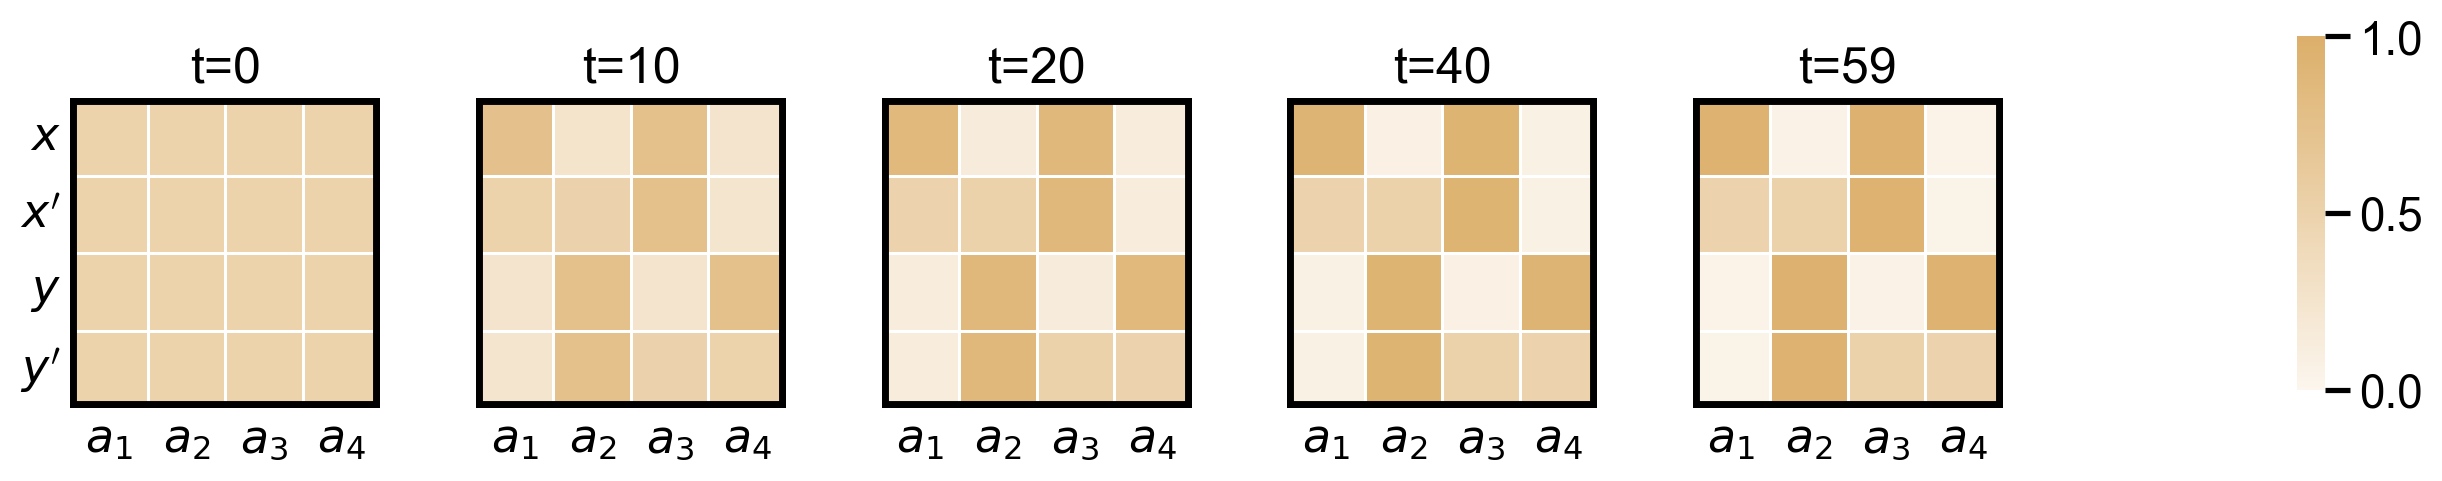

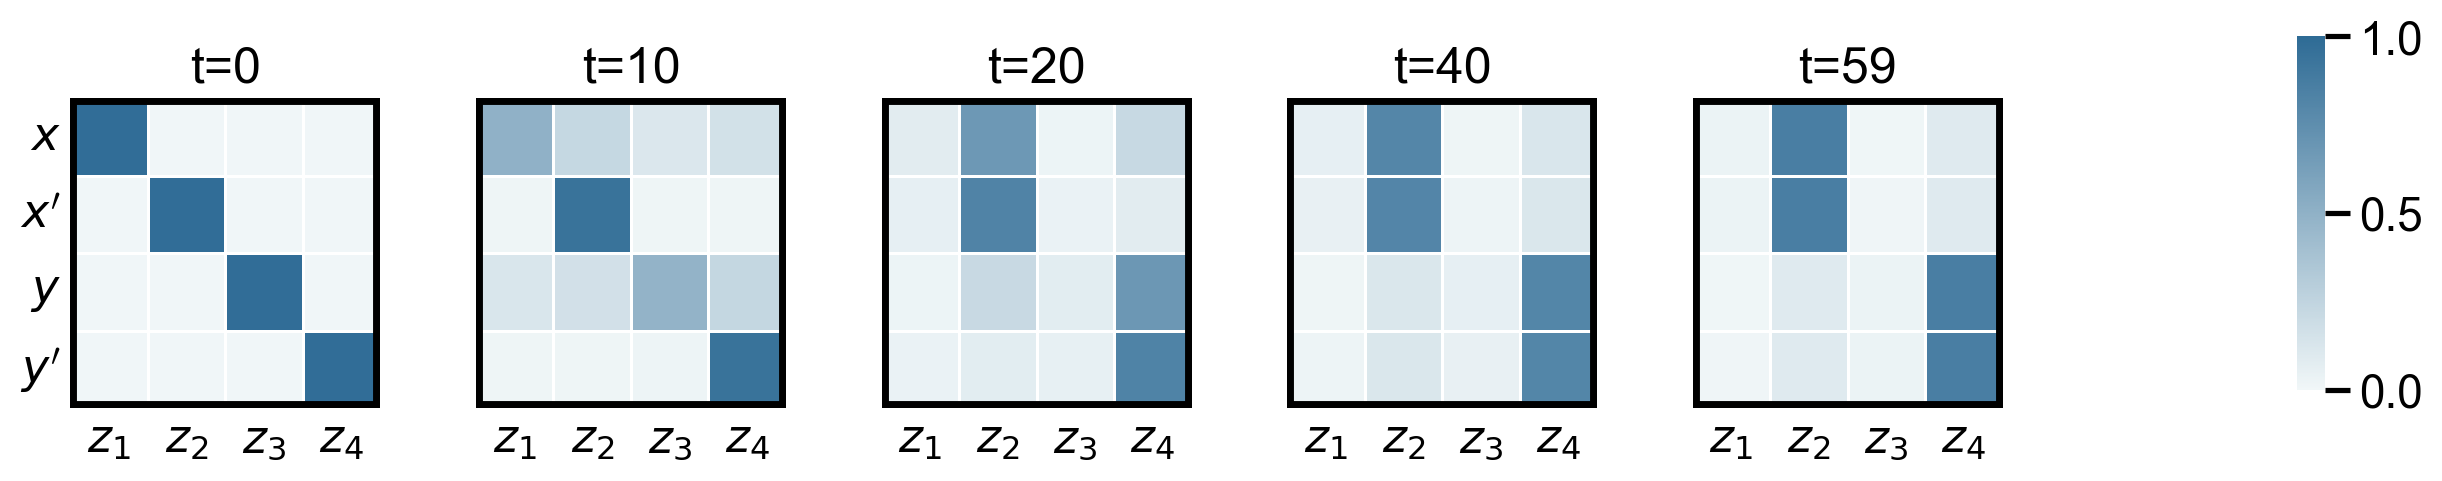

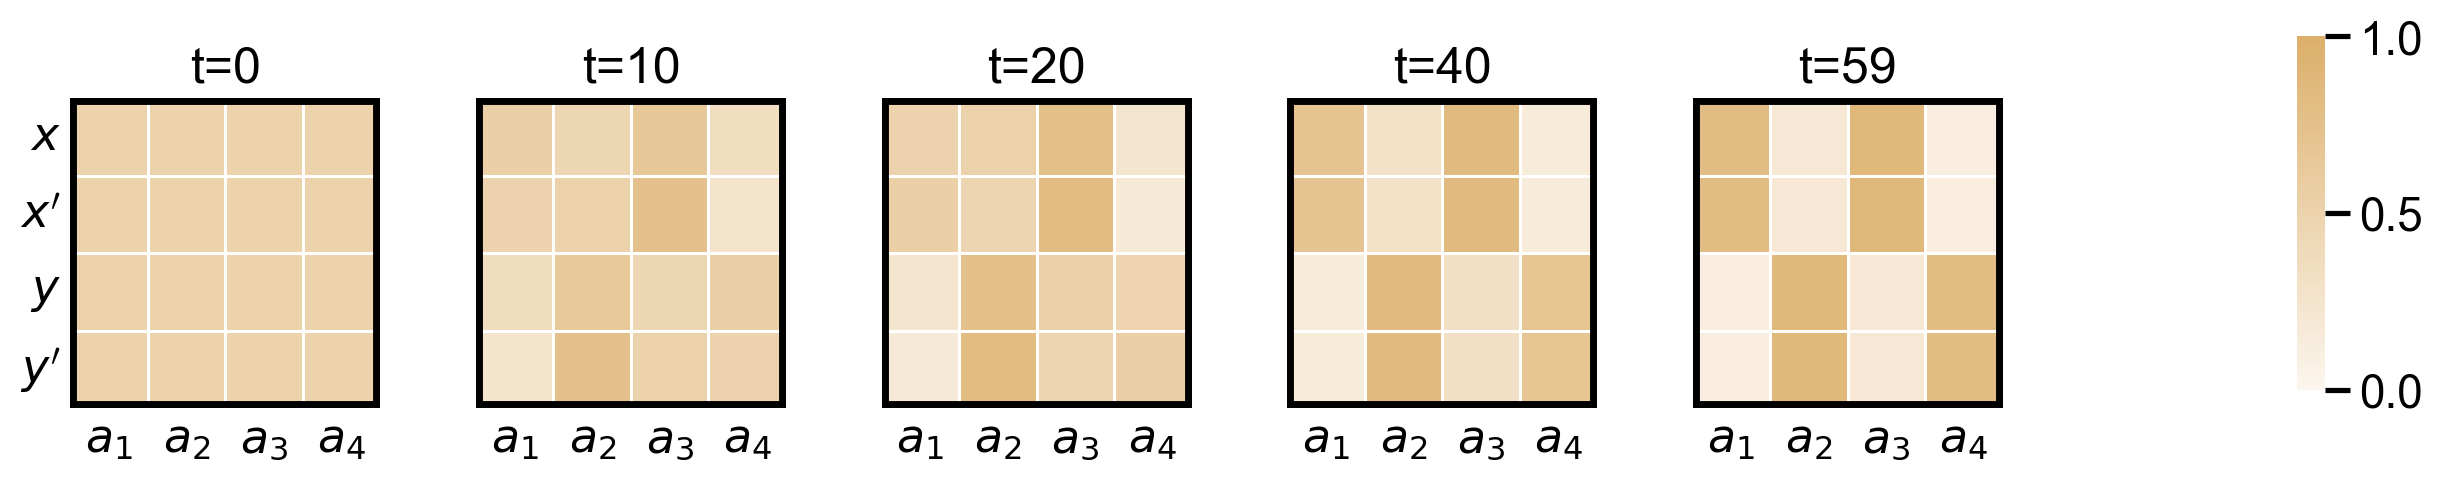

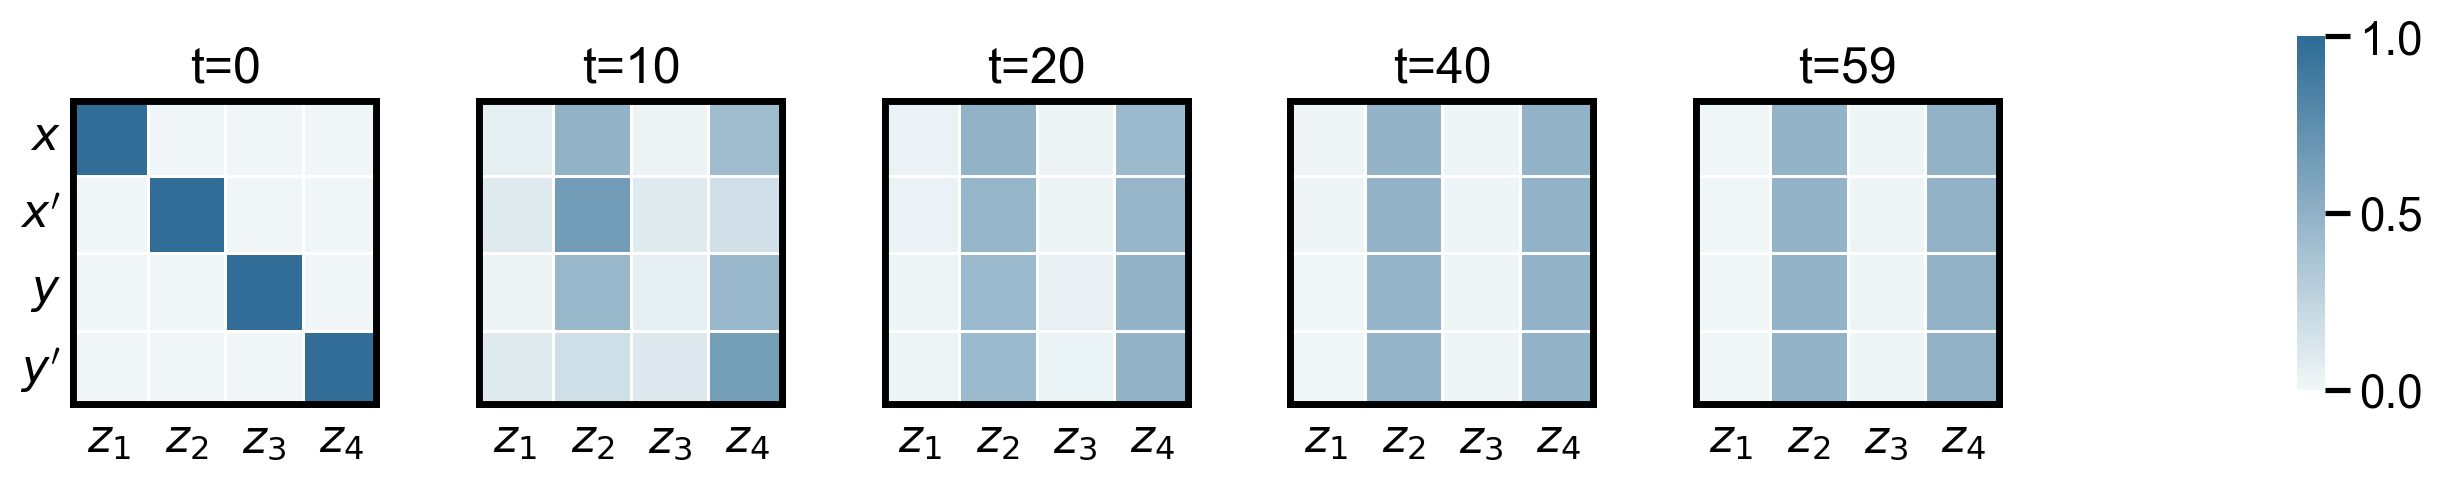

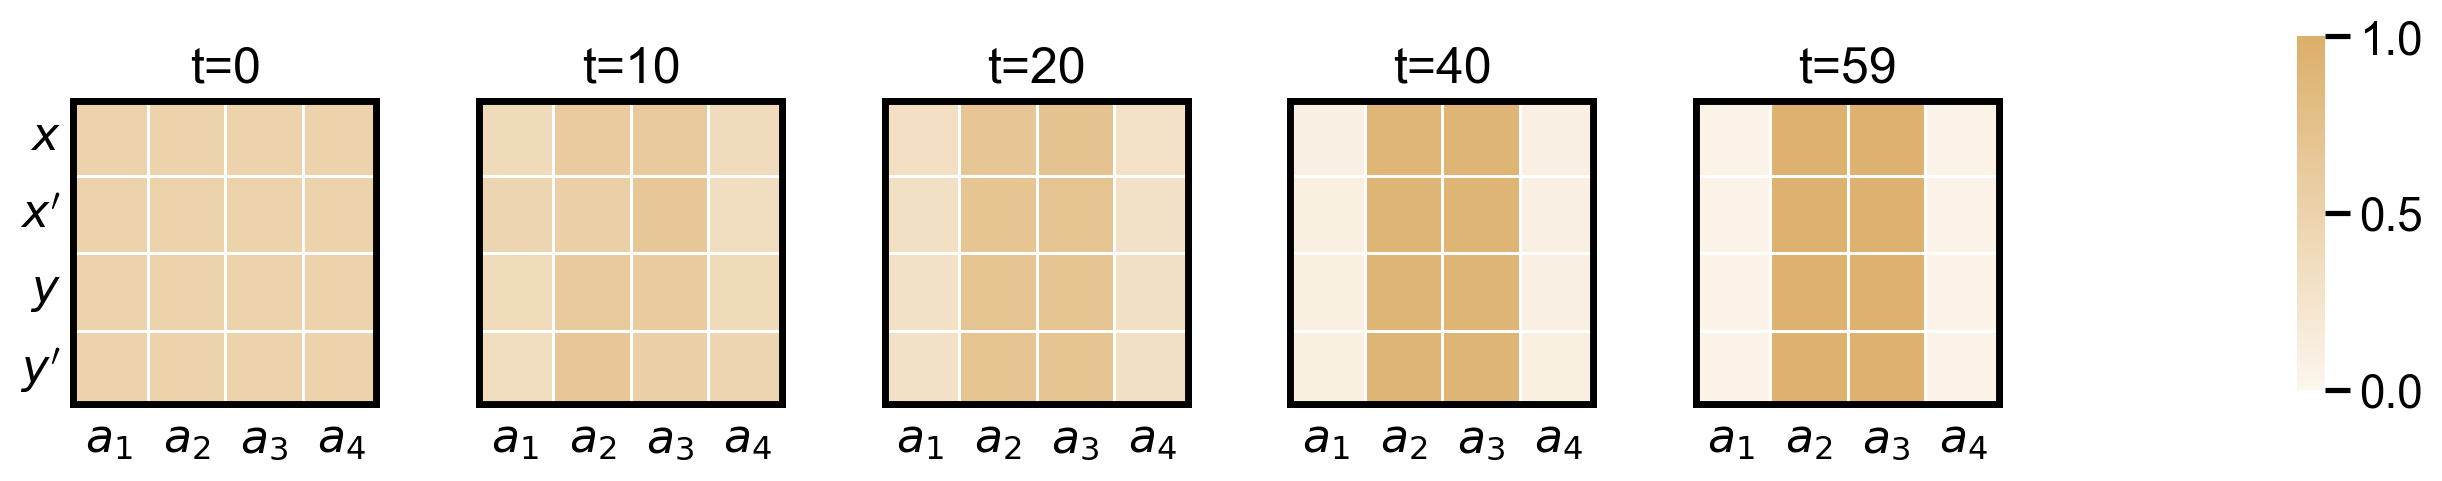

In [76]:
lmbdas = [0, .05, .2, .5]
ind    = ['A', 'B', 'C', 'D']
trials = [0, 10, 20, 40, 59]
for lmbda, idx in zip(lmbdas, ind):
    fname = f'../simulations/exp1/rdPG/simsubj-cont_voi-lmbda={lmbda}.pkl'
    with open(fname, 'rb')as handle:
        voi = pickle.load(handle)
    fname = f'../simulations/exp1/rdPG/simsubj-cont_data-lmbda={lmbda}.csv'
    sim_data = pd.read_csv(fname)
    sim_Insight(voi, sim_data, tar='enc', trials=trials)
    plt.savefig(f'../figures/extend/FigS1{idx}_encoder.pdf', dpi=dpi) 
    sim_Insight(voi, sim_data, tar='pol', trials=trials)
    plt.savefig(f'../figures/extend/FigS1{idx}_policy.pdf', dpi=dpi) 